<a href="https://colab.research.google.com/github/mahimalolla/EcoWatt/blob/main/EcoWatt_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn statsmodels fbprophet xgboost tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.3 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/household_power_consumption.csv', sep=';', low_memory=False)

# Displaying the first few rows
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Data Preprocessing

In [3]:
# Combining 'Date' and 'Time' columns into a single 'DateTime' column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

# Setting 'DateTime' as the index
df.set_index('DateTime', inplace=True)

# Dropping the original 'Date' and 'Time' columns as they are no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)

# Displaying the first few rows to verify
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
#Checking for missing values
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [5]:
df.ffill(inplace=True)
df.isnull().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


**Feature Engineering**

In [6]:
print(df.dtypes)

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [7]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

In [8]:
df.fillna(df.mean(), inplace=True)

In [9]:
df_resampled = df.resample('H').mean()
df_resampled.head()

<ipython-input-9-1756d5f93113>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('H').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [10]:
# Extract hour of the day from the DateTime index
df_resampled['hour'] = df_resampled.index.hour

# Extract day of the week (0 = Monday, 6 = Sunday)
df_resampled['day_of_week'] = df_resampled.index.dayofweek

# Weekend indicator (1 = weekend, 0 = weekday)
df_resampled['is_weekend'] = df_resampled['day_of_week'].isin([5, 6]).astype(int)

# Extract month (1-12)
df_resampled['month'] = df_resampled.index.month

# Extract year (optional, if the dataset spans multiple years)
df_resampled['year'] = df_resampled.index.year

# 7-day rolling average of Global Active Power
df_resampled['rolling_avg_7_days'] = df_resampled['Global_active_power'].rolling(window=7).mean()

# Lag features (previous hours' consumption)
df_resampled['lag_1'] = df_resampled['Global_active_power'].shift(1)
df_resampled['lag_2'] = df_resampled['Global_active_power'].shift(2)

# Peak vs. off-peak indicator (1 = peak hour, 0 = off-peak hour)
df_resampled['is_peak'] = df_resampled['hour'].apply(lambda x: 1 if (6 <= x <= 9) or (17 <= x <= 21) else 0)

# Display the first few rows to verify the features
df_resampled.head(8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,is_weekend,month,year,rolling_avg_7_days,lag_1,lag_2,is_peak
DateTime,,,,,,,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,1,12,2006,NaN,NaN,NaN,1
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,1,12,2006,NaN,4.222889,NaN,1
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,1,12,2006,NaN,3.632200,4.222889,1
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,1,12,2006,NaN,3.400233,3.632200,1
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,1,12,2006,NaN,3.268567,3.400233,1
2006-12-16 22:00:00,2.200133,0.056167,238.760000,9.523333,0.0,0.133333,4.433333,22,5,1,12,2006,NaN,3.056467,3.268567,0
2006-12-16 23:00:00,2.061600,0.071433,240.619667,8.896667,0.0,0.083333,0.000000,23,5,1,12,2006,3.120298,2.200133,3.056467,0
2006-12-17 00:00:00,1.882467,0.102433,240.961833,8.126667,0.0,0.466667,0.000000,0,6,1,12,2006,2.785952,2.061600,2.200133,0


In [11]:
na_count = df_resampled.isna().sum().sum()
print(na_count)

9


In [12]:
df_resampled = df_resampled.fillna(0)
print(df_resampled.isna().sum())

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
hour                     0
day_of_week              0
is_weekend               0
month                    0
year                     0
rolling_avg_7_days       0
lag_1                    0
lag_2                    0
is_peak                  0
dtype: int64


### Time Series Analysis

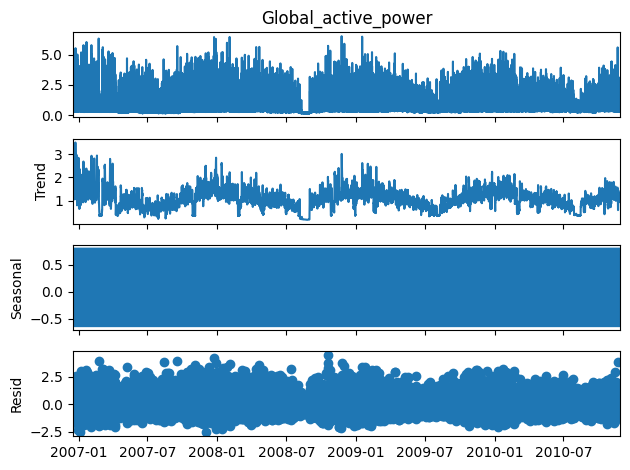

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# Decompose the time series into trend, seasonal, and residual components
decomposition_a = seasonal_decompose(df_resampled['Global_active_power'], model='additive')
decomposition_a.plot()
pyplot.show()

In [14]:
print(decomposition_a.trend)
print(decomposition_a.seasonal)
print(decomposition_a.resid)

DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00   NaN
2010-11-26 20:00:00   NaN
2010-11-26 21:00:00   NaN
Freq: h, Name: trend, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00   -0.037046
2006-12-16 18:00:00    0.230659
2006-12-16 19:00:00    0.634120
2006-12-16 20:00:00    0.799301
2006-12-16 21:00:00    0.777557
                         ...   
2010-11-26 17:00:00   -0.037046
2010-11-26 18:00:00    0.230659
2010-11-26 19:00:00    0.634120
2010-11-26 20:00:00    0.799301
2010-11-26 21:00:00    0.777557
Freq: h, Name: seasonal, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00 

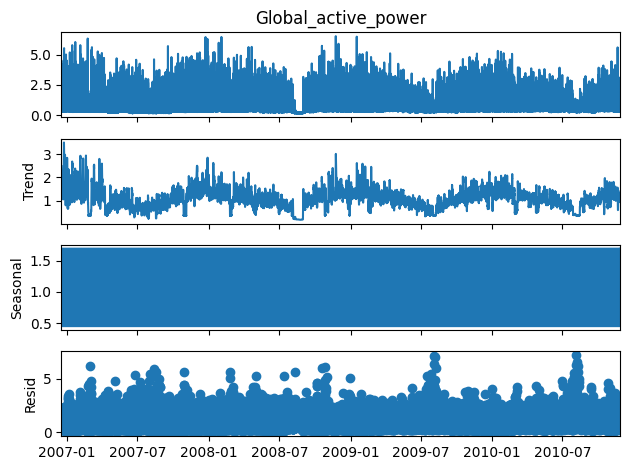

In [15]:
decomposition_m = seasonal_decompose(df_resampled['Global_active_power'], model='multiplicative')
decomposition_m.plot()
pyplot.show()

In [16]:
print(decomposition_m.trend)
print(decomposition_m.seasonal)
print(decomposition_m.resid)

DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00   NaN
2010-11-26 20:00:00   NaN
2010-11-26 21:00:00   NaN
Freq: h, Name: trend, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00    0.936202
2006-12-16 18:00:00    1.156285
2006-12-16 19:00:00    1.517170
2006-12-16 20:00:00    1.685545
2006-12-16 21:00:00    1.694951
                         ...   
2010-11-26 17:00:00    0.936202
2010-11-26 18:00:00    1.156285
2010-11-26 19:00:00    1.517170
2010-11-26 20:00:00    1.685545
2010-11-26 21:00:00    1.694951
Freq: h, Name: seasonal, Length: 34589, dtype: float64
DateTime
2006-12-16 17:00:00   NaN
2006-12-16 18:00:00   NaN
2006-12-16 19:00:00   NaN
2006-12-16 20:00:00   NaN
2006-12-16 21:00:00   NaN
                       ..
2010-11-26 17:00:00   NaN
2010-11-26 18:00:00   NaN
2010-11-26 19:00:00 

In [17]:
df_resampled.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'hour', 'day_of_week', 'is_weekend', 'month', 'year',
       'rolling_avg_7_days', 'lag_1', 'lag_2', 'is_peak'],
      dtype='object')

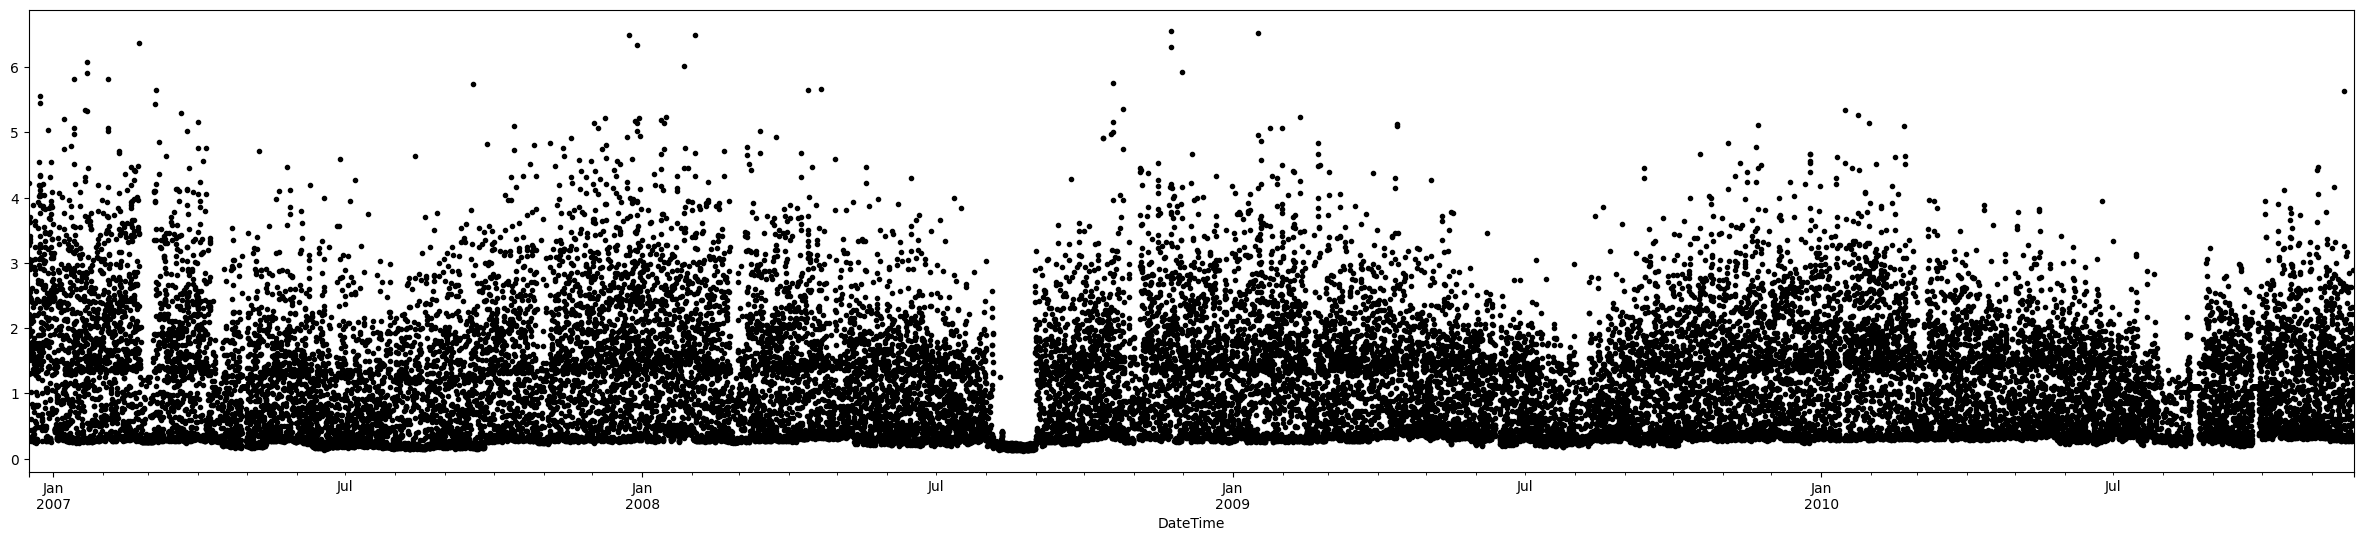

In [18]:
df_resampled['Global_active_power'].plot(style='k.', figsize = (30, 6))
pyplot.show()

<ipython-input-19-c2d24159c15d>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-19-c2d24159c15d>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-19-c2d24159c15d>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-19-c2d24159c15d>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),
<ipython-input-19-c2d24159c15d>:25: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index=pd.date_range(start=name, periods=len(group), freq='H'),


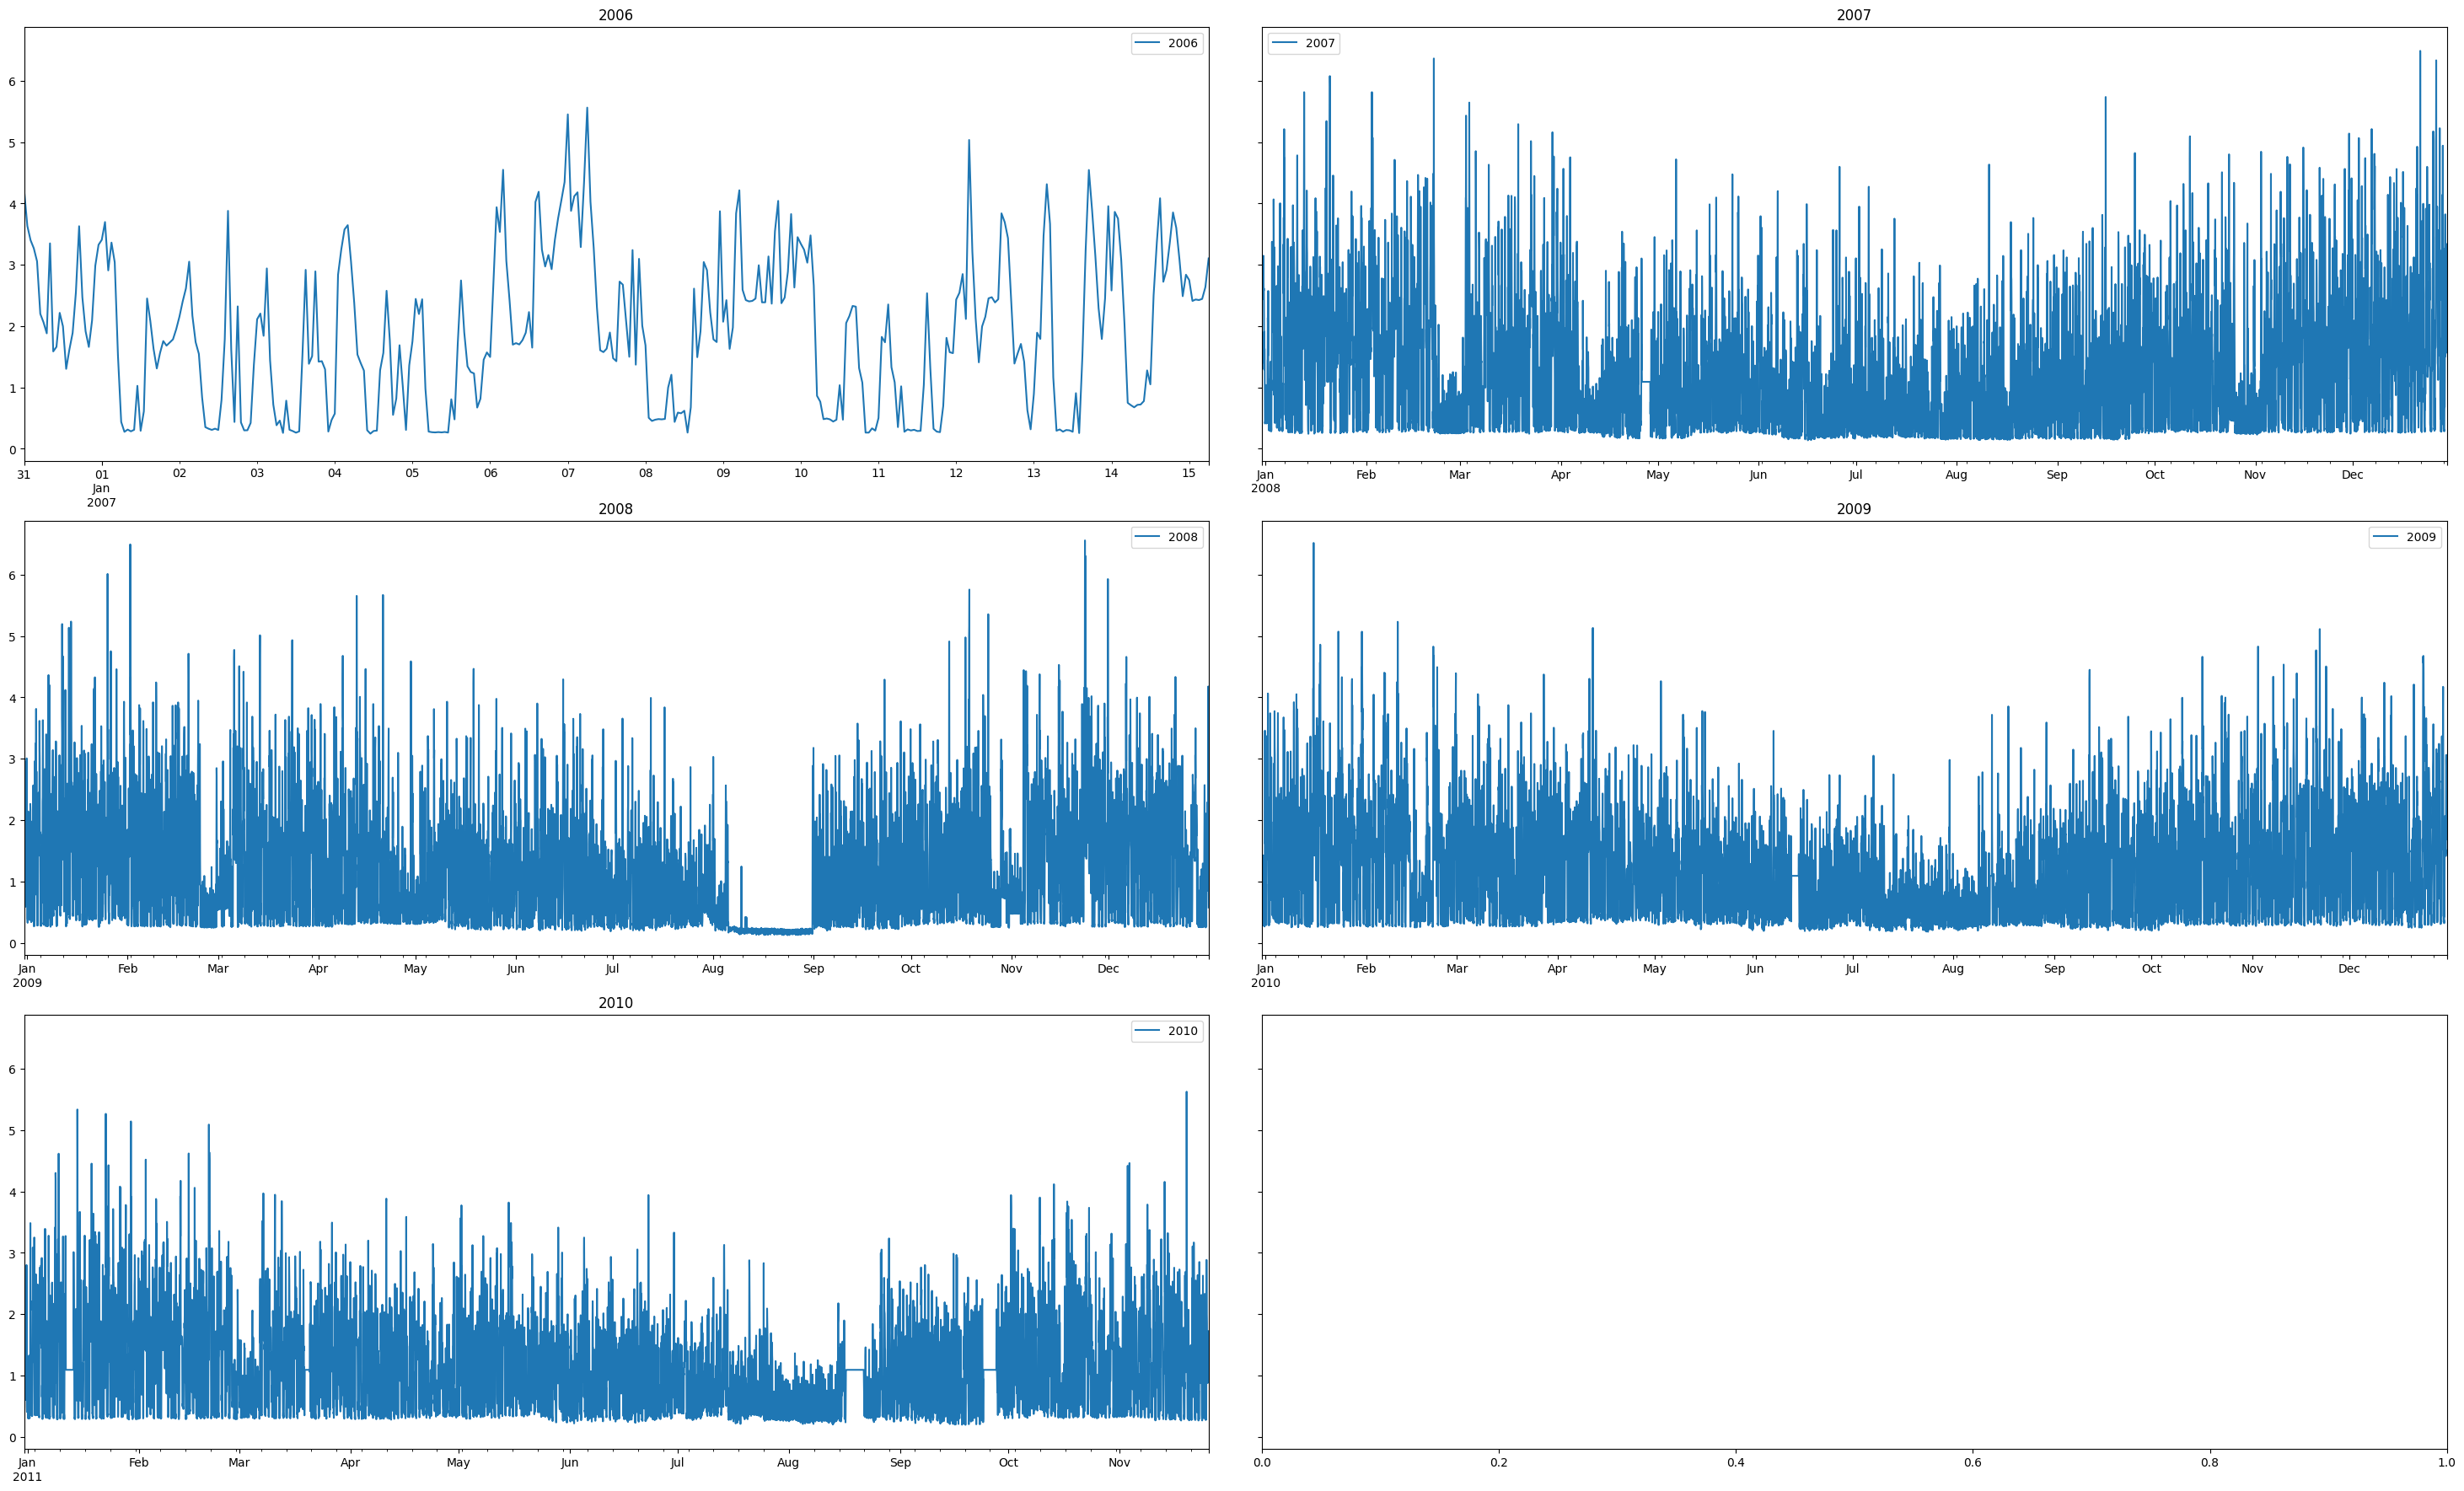

"In the data, there is only one month's data available. Due to this reason, the hourly data available throughout\nthat month is plotted in the 2006 year plot. "

In [19]:
from pandas import Grouper, DataFrame
import matplotlib.pyplot as plt

groups = df_resampled.groupby(Grouper(freq='YE'))
years = DataFrame()

# Calculate the number of rows and columns for subplots
num_years = len(groups)
num_cols = 2  # You can adjust the number of columns as needed
num_rows = (num_years + num_cols - 1) // num_cols

# Create the figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 6 * num_rows), sharey=True)
fig.tight_layout(pad=3.0)  # Adjust padding between subplots

# Iterate through groups and plot on subplots
year_index = 0
for name, group in groups:
    # Calculate subplot row and column
    row = year_index // num_cols
    col = year_index % num_cols

    # Create a new DataFrame for the current year with an hourly index
    year_df = DataFrame(group['Global_active_power'].values,
                       index=pd.date_range(start=name, periods=len(group), freq='H'),
                       columns=[name.year])

    # Plot on the current subplot
    year_df.plot(ax=axes[row, col], title=name.year)

    year_index += 1

plt.show()

'''In the data, there is only one month's data available. Due to this reason, the hourly data available throughout
that month is plotted in the 2006 year plot. '''

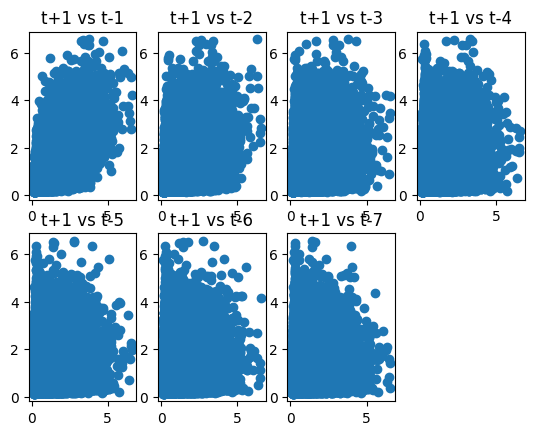

'Positive correlation, as the point clusters are from bottom left to top right'

In [20]:
from pandas import concat
values = DataFrame(df_resampled['Global_active_power'].values)
lags = 7
columns = [values]

for i in range(1, lags + 1):
    columns.append(values.shift(i))
dataframe = concat(columns, axis = 1)
columns = ['t+1']
for i in range(1, lags + 1):
    columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()
'''Positive correlation, as the point clusters are from bottom left to top right'''

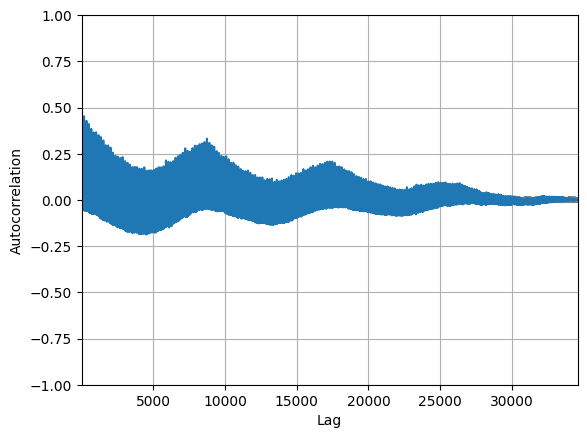

'A seasonality is clearly seen with the positive and negative sine waves over the lags'

In [21]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_resampled['Global_active_power'])
pyplot.show()
'''A seasonality is clearly seen with the positive and negative sine waves over the lags'''

### Model Selection

In [22]:
'''Selecting a time series forecast model based on the dataset.
- Check if there is a multiple seasonality in the data - to confirm usage of Prophet - Check(Present)
- Check for non-linear patterns in the dataset  - to confirm usage of LSTM/RNN
- Check if the dataset classifies under Multivariate time series - to confirm usage of Vector Autoregression'''

'Selecting a time series forecast model based on the dataset.\n- Check if there is a multiple seasonality in the data - to confirm usage of Prophet - Check(Present)\n- Check for non-linear patterns in the dataset  - to confirm usage of LSTM/RNN\n- Check if the dataset classifies under Multivariate time series - to confirm usage of Vector Autoregression'

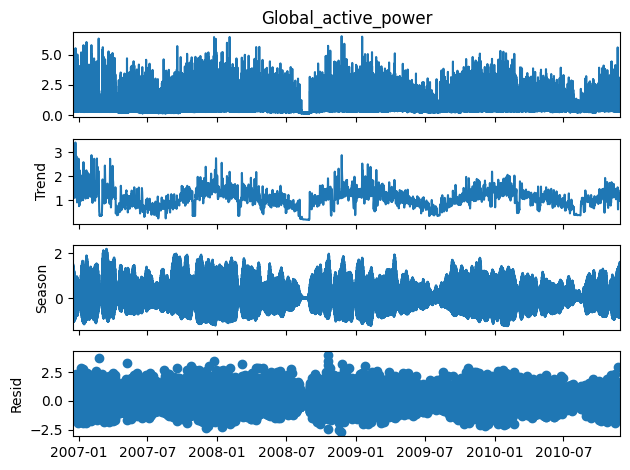

In [23]:
#Multi Seasonality?
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

stl = STL(df_resampled['Global_active_power'], seasonal = 13)
result = stl.fit()

result.plot()
plt.show()

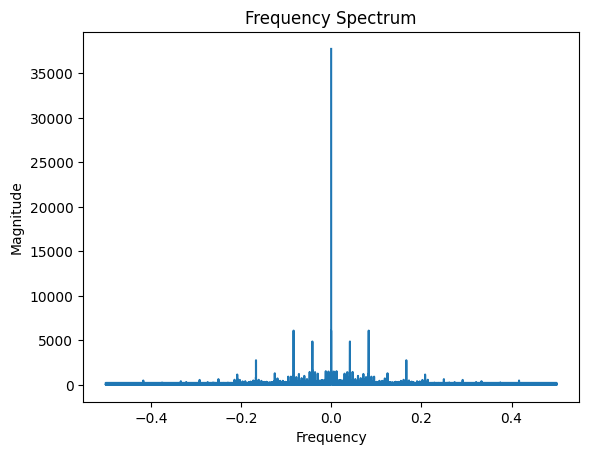

In [24]:
#Fourier Transform
import numpy as np
vals = df_resampled['Global_active_power'].values
fft_vals = np.fft.fft(vals)
fft_freq = np.fft.fftfreq(len(vals))

plt.plot(fft_freq, np.abs(fft_vals))
plt.title("Frequency Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

### From Seasonality and Trends plot and Fourier Transform plot, we can confirm multi seasonality

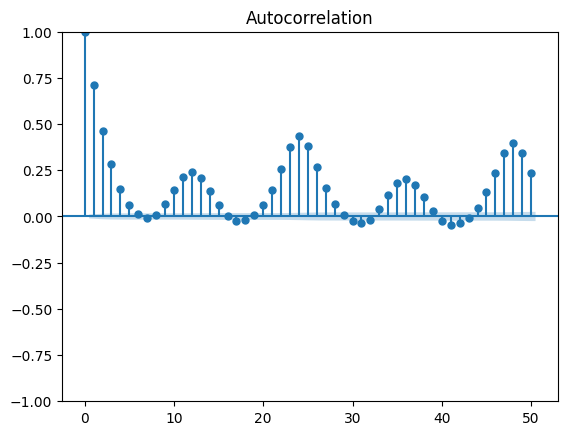

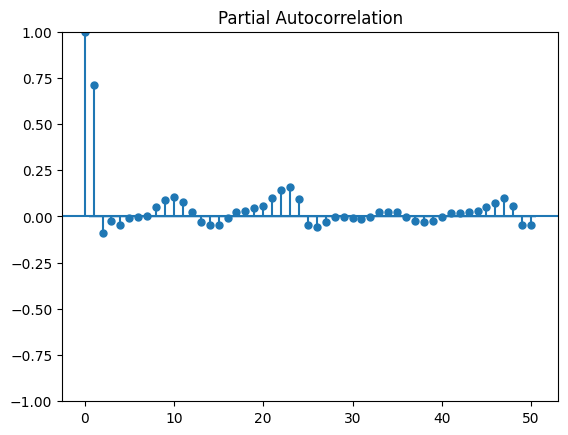

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_resampled['Global_active_power'], lags = 50)
plot_pacf(df_resampled['Global_active_power'], lags = 50)
plt.show()

### For additional tests, the plots on ACF and PACF confirm multi seasonalities in the dataset

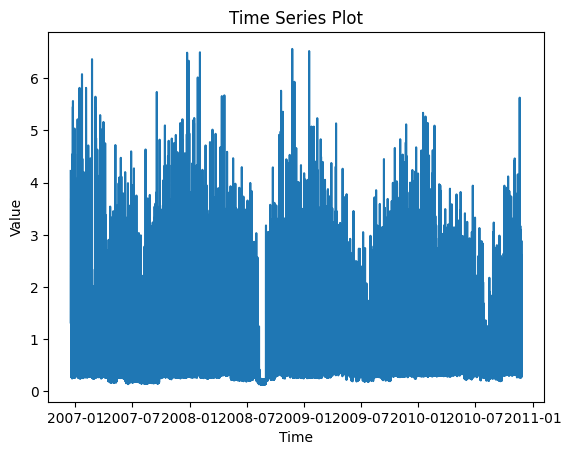

In [26]:
#Non linear dataset?

plt.plot(df_resampled['Global_active_power'])
plt.title("Time Series Plot")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

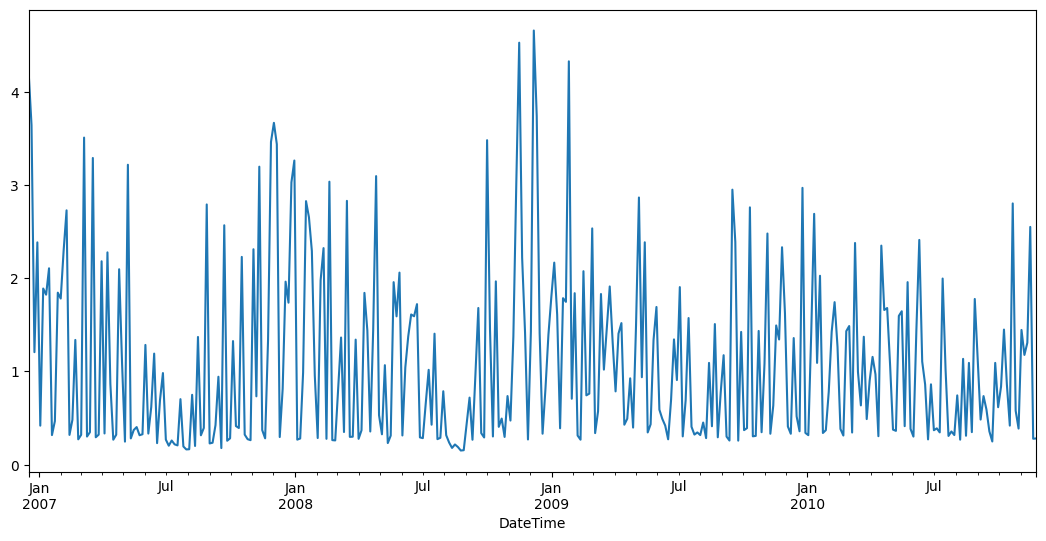

In [27]:
df_downsample = df_resampled.iloc[::100, :]

df_downsample['Global_active_power'].plot(figsize = (13, 6))
plt.show()

### Can see that the dataset has no non-linear patterns as there are no unexpected peaks anywhere and the peaks are seen to be repeating similarly, if not exactly.

In [28]:
#Multivariate?
'''Yes, the dataset is a multivariate time series dataset. Considering our
problem statement, we are only taking to count the 'Global_active_power'.
Other such time dependent variables can be considered while thinking about further steps.'''

"Yes, the dataset is a multivariate time series dataset. Considering our\nproblem statement, we are only taking to count the 'Global_active_power'.\nOther such time dependent variables can be considered while thinking about further steps."

### Forecast models

### ---------------------------Prophet-------------------------

In [29]:
'''Firstly, taking the whole dataset and testing prophet model's predicition
 accuracy.
 If the accuracy is above 80%, use the whole dataset and predict the future from
 the last available year of the data.'''

"Firstly, taking the whole dataset and testing prophet model's predicition\n accuracy.\n If the accuracy is above 80%, use the whole dataset and predict the future from\n the last available year of the data."

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_fj5joz/au_zf_bl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_fj5joz/9jru6zff.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25191', 'data', 'file=/tmp/tmp7_fj5joz/au_zf_bl.json', 'init=/tmp/tmp7_fj5joz/9jru6zff.json', 'output', 'file=/tmp/tmp7_fj5joz/prophet_modelq93yn9kk/prophet_model-20250502020701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 0.68
RMSE: 0.87


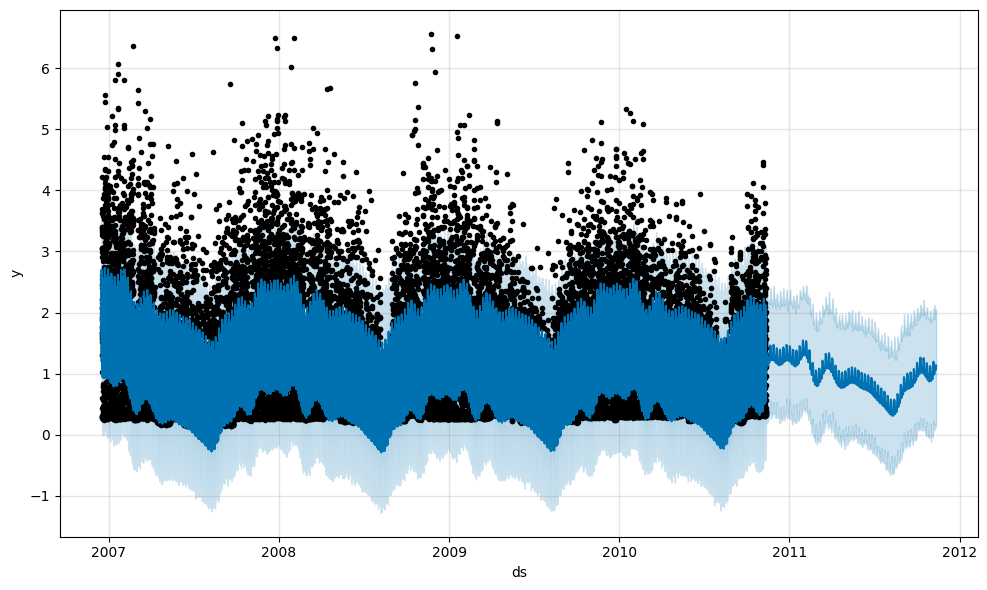

In [30]:
#Prophet
from prophet import Prophet  # Make sure you're using the correct package
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reset the index
df_reset = df_resampled.reset_index()

# Prepare the data for Prophet
df_prophet = df_reset[['DateTime', 'Global_active_power']].rename(columns={'DateTime': 'ds', 'Global_active_power': 'y'})

#split dataset for accuracy checking
train_df = df_prophet[:-365]
test_df = df_prophet[-365:]

# Initialize the Prophet model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)

# Fit the model on the train data
model.fit(train_df)

# Create a future dataframe (365 days ahead)
future_test = model.make_future_dataframe(periods=365)
forecast_test = model.predict(future_test)

y_pred = forecast_test['yhat'][-365:].values
y_true = test_df['y'].values

#evaluation metrics
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'MAE: {mae:.2f}') #low refers to good model
print(f'RMSE: {rmse:.2f}') #low refers to a good model

# Predict the future
forecast = model.predict(future_test)

# Plot the forecast
model.plot(forecast)
plt.show()


In [31]:
print(df_prophet['y'].min())
print(df_prophet['y'].max())

0.12400000000000001
6.560533333333334


In [32]:
'''The MAE and RMSE turned out to be fairly good (considering the NRMSE) for a target variable
 ranging from 0.12 to 6.56.
 This being the case, the future from the last year of the data available is
 being predicted.'''

'The MAE and RMSE turned out to be fairly good (considering the NRMSE) for a target variable\n ranging from 0.12 to 6.56.\n This being the case, the future from the last year of the data available is\n being predicted.'

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_fj5joz/5rnlyyw9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_fj5joz/pczzmawm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77642', 'data', 'file=/tmp/tmp7_fj5joz/5rnlyyw9.json', 'init=/tmp/tmp7_fj5joz/pczzmawm.json', 'output', 'file=/tmp/tmp7_fj5joz/prophet_modelumls8rc2/prophet_model-20250502020723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:07:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:07:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


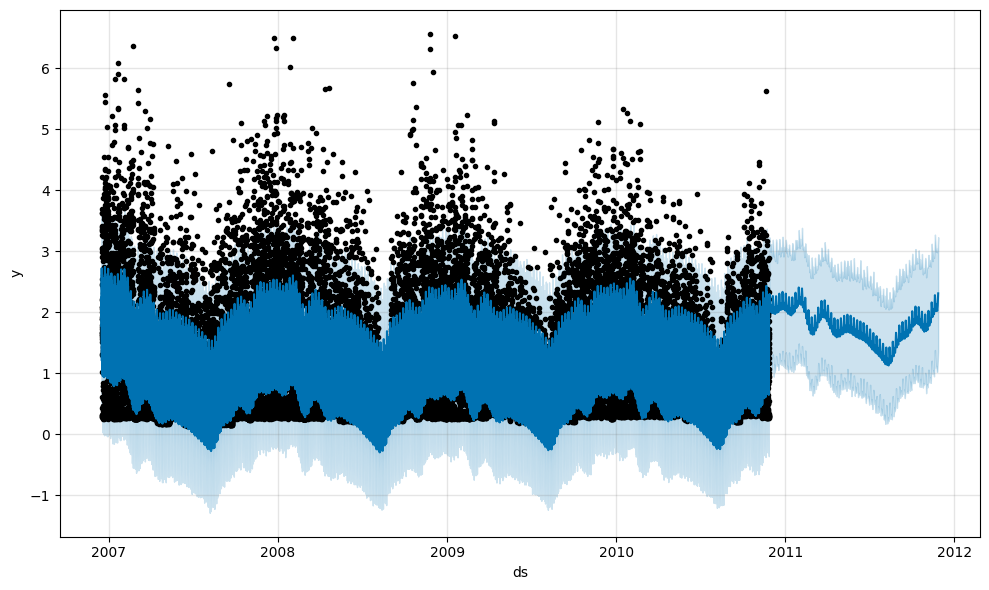

In [33]:
#Prophet
from prophet import Prophet  # Make sure you're using the correct package
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reset the index
df_reset = df_resampled.reset_index()

# Prepare the data for Prophet
df_prophet = df_reset[['DateTime', 'Global_active_power']].rename(columns={'DateTime': 'ds', 'Global_active_power': 'y'})

# Initialize the Prophet model
model = Prophet(weekly_seasonality=True, yearly_seasonality=True)

# Fit the model on the train data
model.fit(df_prophet)

# Create a future dataframe (365 days ahead)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Predict the future
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.show()


In [34]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34954 entries, 0 to 34953
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      34954 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 273.2 KB


In [35]:
forecast[['ds', 'yhat']].head()

,ds,yhat
0,2006-12-16 17:00:00,1.780048
1,2006-12-16 18:00:00,2.128869
2,2006-12-16 19:00:00,2.529356
3,2006-12-16 20:00:00,2.722515
4,2006-12-16 21:00:00,2.574493


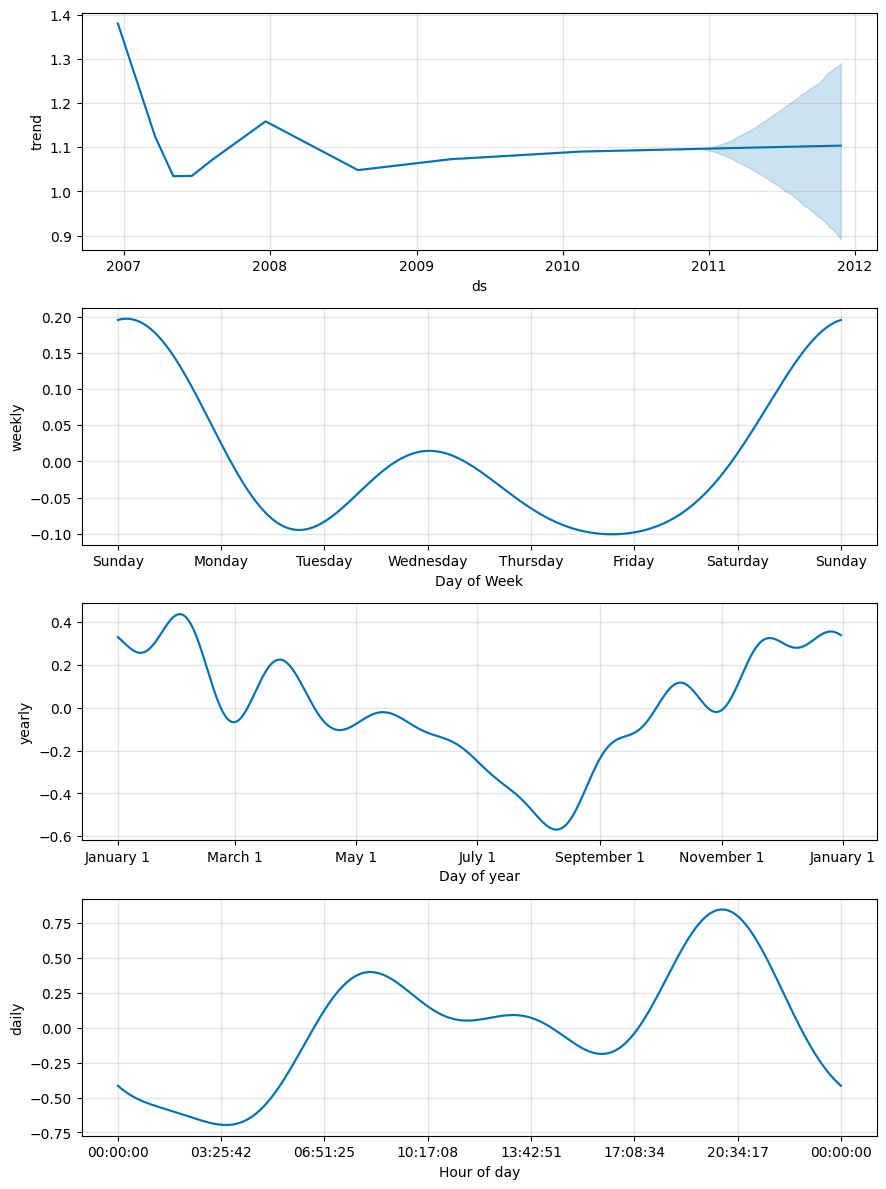

In [36]:
fig = model.plot_components(forecast)

### ------------------------SARIMA---------------------------

In [37]:
#testing
from statsmodels.tsa.statespace.sarimax import SARIMAX

df_sarima = df_resampled.copy()

train_df = df_sarima[:-365]
test_df = df_sarima[-365:]

model = SARIMAX(df_sarima['Global_active_power'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()

forecast = model_fit.get_forecast(steps = 365)
forecast_values = forecast.predicted_mean

actual_values = test_df['Global_active_power']

mae = mean_absolute_error(actual_values, forecast_values)
rmse = np.sqrt(mean_squared_error(actual_values, forecast_values))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

# plt.plot(df_resampled.index, df_sarima['Global_active_power'], label = 'Original')
# plt.plot(forecast.index, forecast, color = 'red', label = 'Forecast')
# plt.legend()
# plt.show()

MAE: 0.85
RMSE: 1.01


In [38]:
'''Considering the RMSE to be 1.01 and NRMSE to be 0.159, SARIMA seems to be a
better working model than Prophet.
Future prediction is being done using SARIMA.'''

'Considering the RMSE to be 1.01 and NRMSE to be 0.159, SARIMA seems to be a\nbetter working model than Prophet.\nFuture prediction is being done using SARIMA.'

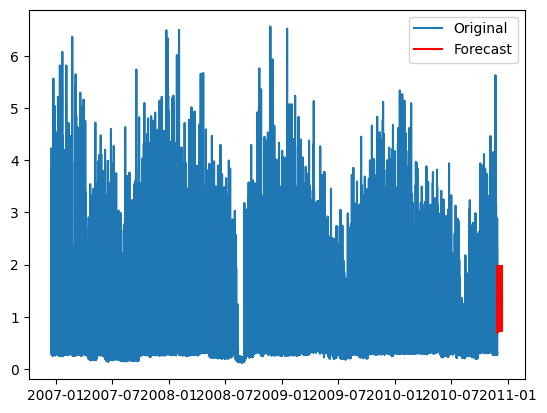

In [39]:
model = SARIMAX(df_sarima['Global_active_power'], order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
model_fit = model.fit()

forecast = model_fit.forecast(steps = 365)

plt.plot(df_resampled.index, df_sarima['Global_active_power'], label = 'Original')
plt.plot(forecast.index, forecast, color = 'red', label = 'Forecast')
plt.legend()
plt.show()

### ----------------------LSTM--------------------------

In [40]:
!pip install keras

In [41]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = scaler.fit_transform(df_resampled['Global_active_power'].values.reshape(-1, 1))

def create_dataset(dataset, look_back = 1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
      X.append(dataset[i:(i + look_back), 0])
      y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 365
X, y = create_dataset(df_scaled, look_back)

X = X.reshape(X.shape[0], X.shape[1], 1)

train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

model = Sequential()
model.add(LSTM(64, input_shape = (X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, epochs = 100, batch_size = 32)

pred = model.predict(X_test)

pred = scaler.inverse_transform(pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_inv, pred)
rmse = np.sqrt(mean_squared_error(y_test_inv, pred))

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 119s 133ms/step - loss: 0.0136
Epoch 2/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 145s 137ms/step - loss: 0.0096
Epoch 3/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 111s 129ms/step - loss: 0.0087
Epoch 4/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 109s 127ms/step - loss: 0.0087
Epoch 5/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 142s 126ms/step - loss: 0.0084
Epoch 6/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 143s 127ms/step - loss: 0.0084
Epoch 7/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 141s 126ms/step - loss: 0.0085
Epoch 8/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 142s 126ms/step - loss: 0.0083
Epoch 9/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 140s 124ms/step - loss: 0.0080
Epoch 10/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 144s 126ms/step - loss: 0.0081
Epoch 11/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 140s 123ms/step - loss: 0.0080
Epoch 12/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 143s 125ms/step - loss: 0.0082
Epoch 13/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 141s 123ms/step - loss: 0.0083
Epoch 14/100
856/856 ━━━━━━━━━━━━━━━━━━━━ 143s 125ms/step - 

In [45]:
'''The RMSE observed is lower than the other 2 models used to predict the
forecast. Considering the NRMSE, the forecast on the next year is performed.'''

'The RMSE observed is lower than the other 2 models used to predict the\nforecast. Considering the NRMSE, the forecast on the next year is performed.'

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 149s 135ms/step - loss: 0.0126
Epoch 2/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 192s 126ms/step - loss: 0.0086
Epoch 3/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 143s 127ms/step - loss: 0.0083
Epoch 4/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 142s 127ms/step - loss: 0.0078
Epoch 5/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 143s 127ms/step - loss: 0.0078
Epoch 6/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - loss: 0.0079
Epoch 7/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 142s 128ms/step - loss: 0.0079
Epoch 8/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 136s 127ms/step - loss: 0.0077
Epoch 9/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 142s 127ms/step - loss: 0.0076
Epoch 10/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 141s 126ms/step - loss: 0.0078
Epoch 11/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 142s 126ms/step - loss: 0.0081
Epoch 12/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 143s 127ms/step - loss: 0.0077
Epoch 13/100
1070/1070 ━━━━━━━━━━━━━━━━━━━━ 142s 127ms/step - loss: 0.0080
Epoch 14/100
1070/1070 ━━━━━━━━━━━

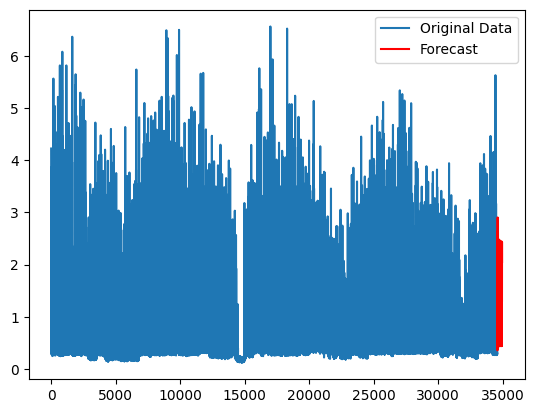

In [42]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = scaler.fit_transform(df_resampled['Global_active_power'].values.reshape(-1, 1))

def create_dataset(dataset, look_back = 1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
      X.append(dataset[i:(i + look_back), 0])
      y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 365
X, y = create_dataset(df_scaled, look_back)

X = X.reshape(X.shape[0], X.shape[1], 1)

model = Sequential()
model.add(LSTM(64, input_shape = (X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X, y, epochs = 100, batch_size = 32)

forecast_input = X[-1]

forecast = []

for _ in range(365):
  next_value = model.predict(forecast_input.reshape(1, look_back, 1))
  forecast.append(next_value[0, 0])
  forecast_input = np.append(forecast_input[1:], next_value, axis = 0)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

plt.plot(np.arange(len(df_sarima)), df_sarima['Global_active_power'], label = 'Original Data')
plt.plot(np.arange(len(df_sarima), len(df_sarima) + 365), forecast, label = 'Forecast', color = 'red')
plt.legend()
plt.show()